# PROBLEM STATEMENT

1. To automate the labelling process for school's expenditure items so that we can more easily compare school's expenditure against one another to improve their performance.

# ADMIN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 999

route = '/Users/zhiwei/Documents/zhiwei_folder/data_science_career/general_assembly_course/class/downloads_github_enterprise/projects/capstone/schoolbudget_dataset/dataset'
df = pd.read_csv(route + '/TrainingData.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)

#  INSPECTION

In [3]:
df = df[:]

print(df.shape)
print('='*40)

#only 2 features which are float objects (1) FTE:Full Time Employee (2) Total
print(df.info())
print('='*40)

print('number of data types in my data set: ', df.dtypes.nunique())
print('='*40)

print(df.describe())
print('='*40)

(400277, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400277 entries, 0 to 400276
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null floa

# EDA

Text(0.63,50000,'0 = not full time, 1 = full time')

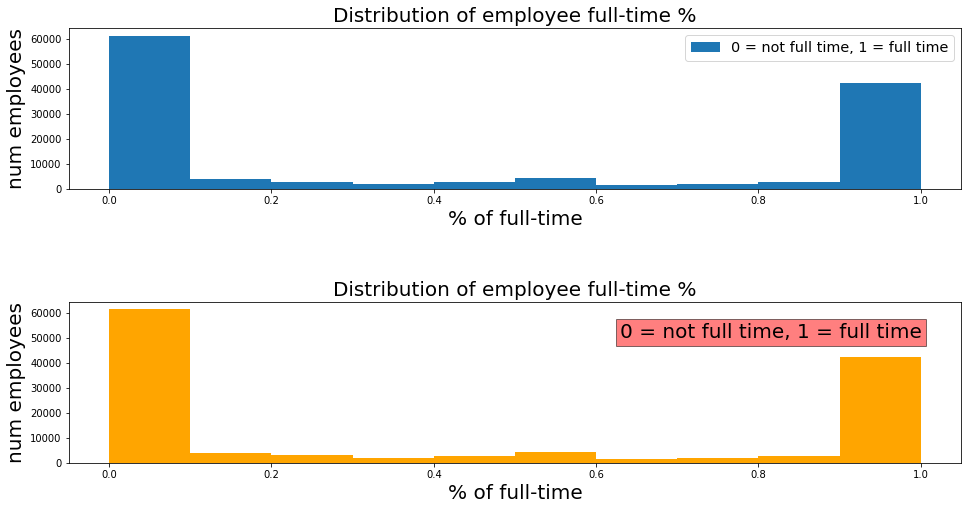

In [191]:
#setting up FTE column to plot
fte = df['FTE'] = df['FTE'].apply(lambda x: 1 if x > 1 else (0 if x < 0 else x)).dropna()

#setting up the figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))
fig.subplots_adjust(hspace=0.7)

#setting up axis1
fte.plot(kind='hist', ax=ax1, label='0 = not full time, 1 = full time')
ax1.set_title('Distribution of employee full-time %', size=20)
ax1.set_xlabel('% of full-time', size=20)
ax1.set_ylabel('num employees', size=20)
ax1.legend(fontsize='x-large')

#axis2
fte.plot(kind='hist', ax=ax2, color='orange')
ax2.set_title('Distribution of employee full-time %', size=20)
ax2.set_xlabel('% of full-time', size=20)
ax2.set_ylabel('num employees', size=20)
ax2.text(0.63, 50000, '0 = not full time, 1 = full time', size=20, bbox=dict(facecolor='red', alpha=0.5))

    ####REMARKS####
#.plot is a pandas method whereby the visualization does not appear in a window. This makes the appearance of the
#charts appealing. 

count    3.957220e+05
mean     1.706067e+04
std      3.680634e+05
min      0.000000e+00
25%      1.290962e+02
50%      6.531659e+02
75%      4.571945e+03
max      1.297000e+08
Name: Total, dtype: float64
NOTE: scale is 1e8, which is 100 million - 1e6 is 1 million, 1e7 is 10 million and 1e8 is 100 million


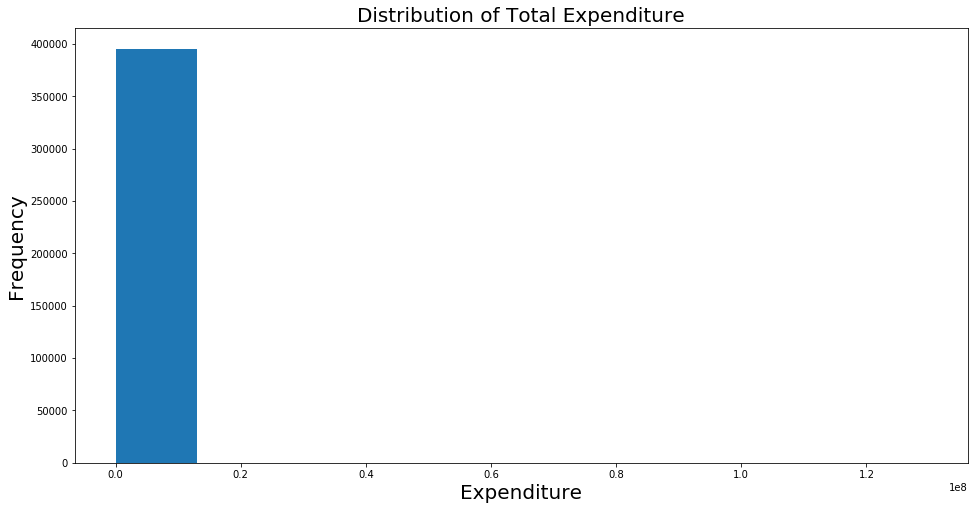

In [175]:
#change negative to postive - assumed negative is wrongly labelled
df['Total'] = df['Total'].apply(lambda x: abs(x) if x <0 else x)

#df.describe()
print(df['Total'].describe())

#plot expenditure distribution
df['Total'].plot(kind='hist', figsize=(16,8))
plt.title('Distribution of Total Expenditure', size=20)
plt.xlabel('Expenditure', size=20)
plt.ylabel('Frequency', size=20)
print('='*40)

print('NOTE: scale is 1e8, which is 100 million - 1e6 is 1 million, 1e7 is 10 million and 1e8 is 100 million')
print('='*40)

#### log 'Total' to see distribution

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

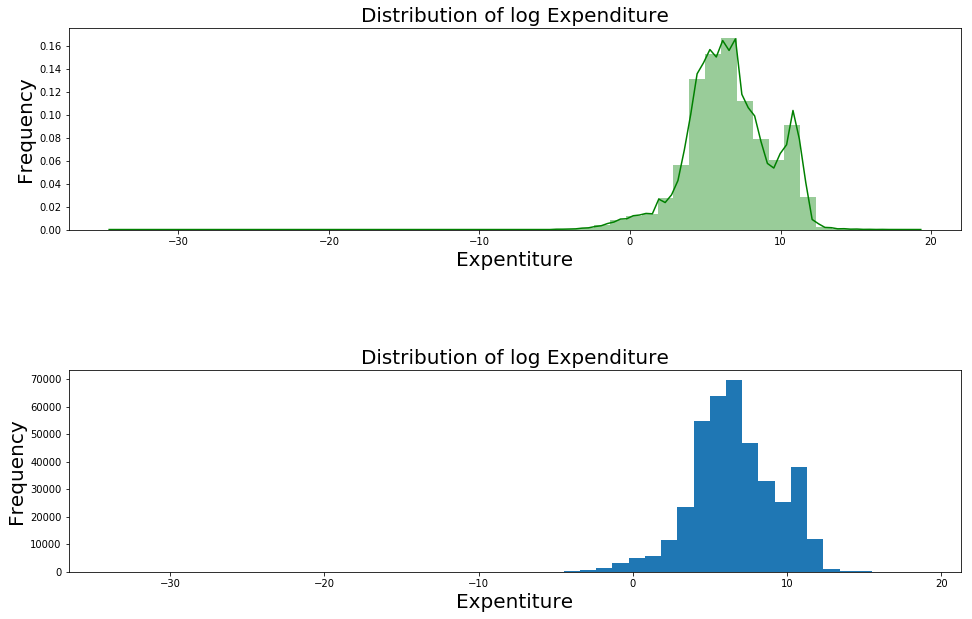

In [192]:
import math

#create axis for subplots, and state figsize
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,10))
fig.subplots_adjust(hspace=0.7)

#manipulate data to plot
logtotal = df['Total'].apply(lambda x: math.log(x) if x > 0 else x).dropna()

#plotting from seaborn
sns.distplot(logtotal, ax=ax1, color='green')
ax1.set_title('Distribution of log Expenditure', size=20)
ax1.set_xlabel('Expentiture', size=20)
ax1.set_ylabel('Frequency', size=20)

#plotting from padas for comparision
logtotal.plot(kind='hist', bins=50, ax=ax2)
ax2.set_title('Distribution of log Expenditure', size=20)
ax2.set_xlabel('Expentiture', size=20)
ax2.set_ylabel('Frequency', size=20)


Text(36.625,0.5,'Frequency')

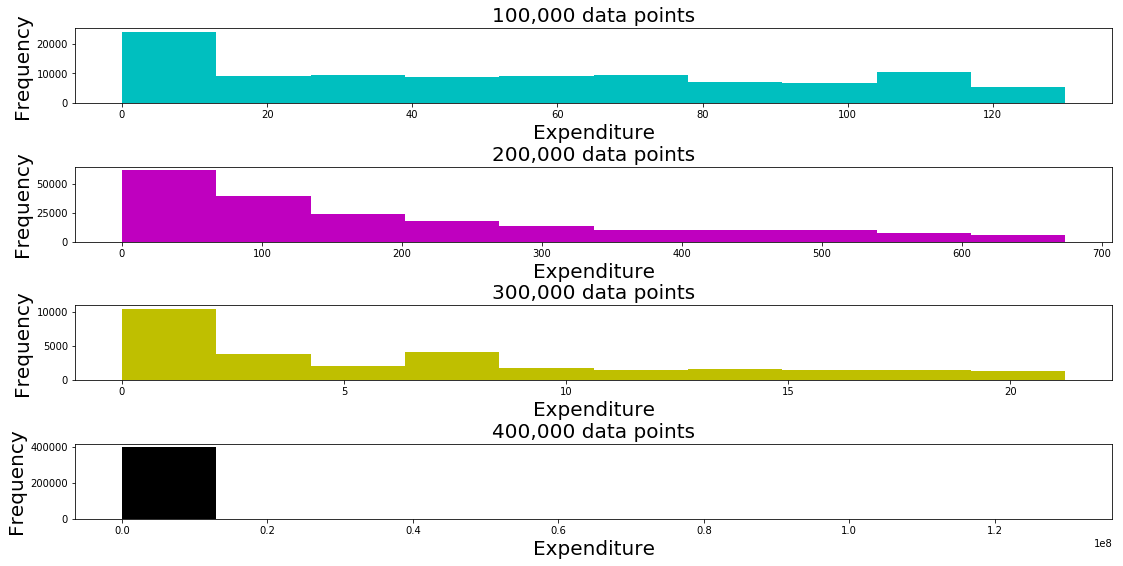

In [230]:
#first 50,000 values are below 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.subplots_adjust(hspace=2)
fig.tight_layout()


df['Total'].sort_values()[:100000].plot(kind='hist', figsize=(16,8), color='c', ax=ax1)
ax1.set_title('100,000 data points', size=20)
ax1.set_xlabel('Expenditure', size=20)
ax1.set_ylabel('Frequency', size=20)

df['Total'].sort_values()[:200000].plot(kind='hist', figsize=(16,8), color='m', ax=ax2)
ax2.set_title('200,000 data points', size=20)
ax2.set_xlabel('Expenditure', size=20)
ax2.set_ylabel('Frequency', size=20)

df['Total'].sort_values()[:30000].plot(kind='hist', figsize=(16,8), color='y', ax=ax3)
ax3.set_title('300,000 data points', size=20)
ax3.set_xlabel('Expenditure', size=20)
ax3.set_ylabel('Frequency', size=20)

df['Total'].sort_values()[:400000].plot(kind='hist', figsize=(16,8), color='k', ax=ax4)
ax4.set_title('400,000 data points', size=20)
ax4.set_xlabel('Expenditure', size=20)
ax4.set_ylabel('Frequency', size=20)

# plt color: ‘b’	blue ‘g’	green ‘r’	red ‘c’	cyan ‘m’	magenta ‘y’	yellow ‘k’	black ‘w’	white

character	color
‘b’	blue
‘g’	green
‘r’	red
‘c’	cyan
‘m’	magenta
‘y’	yellow
‘k’	black
‘w’	white

Text(0,0.5,'Number of unique values')

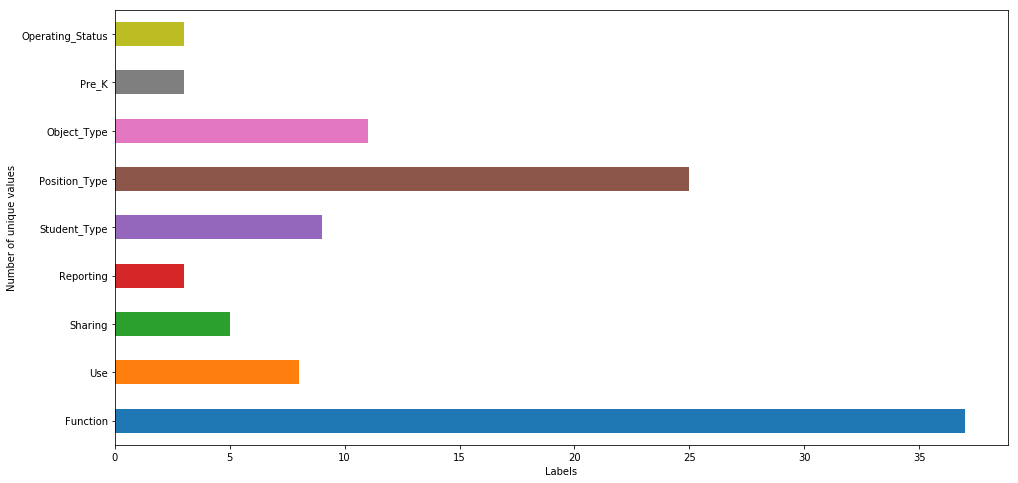

In [229]:
#organize columns into labels and non-labels
LABELS = df.columns.values[0:9]
NON_LABELS = [c for c in df.columns if c not in LABELS]

#figure
fig, ax = plt.subplots(1,1, figsize=(16,8))

#nunique is a series method.Apply to each series.
nunique_labels = df[LABELS].apply(lambda x: x.nunique())
nunique_labels.plot(kind='barh',ax=ax)

ax.set_xlabel('Labels')
ax.set_ylabel('Number of unique values')

# LOGISTIC REGRESSION

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

#pd.options.display.max_rows = 999
#pd.options.display.max_columns = 999

route = '/Users/zhiwei/Documents/zhiwei_folder/data_science_career/general_assembly_course/class/downloads_github_enterprise/projects/capstone/schoolbudget_dataset/dataset'
df = pd.read_csv(route + '/TrainingData.csv')
df = df.iloc[:100000]
df.drop('Unnamed: 0', axis=1, inplace=True)

#some data cleaning
df['FTE'] = df['FTE'].apply(lambda x: 1 if x > 1 else abs(x))
df['Total'] = df['Total'].apply(lambda x: abs(x) if x <0 else x)

#column names organizing
numeric_col_names = ['FTE','Total']
labels_col_names = df.columns.values[0:10].tolist()
text_col_names = [c for c in df.columns if c not in (numeric_col_names + labels_col_names)]
non_labels_col_names = [c for c in df.columns if c not in labels_col_names]

numeric_df = df[numeric_col_names].copy()
labels_df = df[labels_col_names].copy()
text_df = df[text_col_names].copy()

In [9]:
def combine_text_columns(data_frame, to_drop=numeric_col_names + labels_col_names):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=0, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=0, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=0, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [10]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[labels_col_names])

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[non_labels_col_names],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[numeric_col_names], validate=False)

In [11]:
from sklearn import naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 131 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 179 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 183 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 223 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 231 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/skl


Accuracy on budget dataset:  0.1349


# NAIVE BAYES

#### BernoulliNB()

In [13]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(naive_bayes.BernoulliNB()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 131 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 179 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 183 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 223 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 231 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/skl


Accuracy on budget dataset:  0.0805


#### naive_bayes.MultinomialNB()

In [14]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(naive_bayes.MultinomialNB()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 131 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 179 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 183 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 223 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 231 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/skl


Accuracy on budget dataset:  0.01125


#### naive_bayes.MultinomialNB() with cross_val_score

In [15]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(naive_bayes.MultinomialNB()))
    ])


print (cross_val_score(pl, df[non_labels_col_names], dummy_labels, cv=3))


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 114 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 125 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 131 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 136 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 179 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 220 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/skl

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 351 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 356 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 367 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 381 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 383 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 395 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/skl

[0.01055979 0.01068011 0.01164012]


# SVM

In [16]:
from sklearn import naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(svm.LinearSVC()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 131 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 179 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 183 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 223 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 231 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))
/anaconda2/envs/py36/lib/python3.6/site-packages/skl


Accuracy on budget dataset:  0.19055


# RANDOM FOREST CLASSIFIER

In [18]:
# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.7249


#### with n_estimators = 15

In [19]:
# Import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.7418
